In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import json

In [ ]:
datset_path = os.getcwd()

train_data_path = os.path.join(datset_path,'training')
test_data_path = os.path.join(datset_path,'test')

## Processing Training data


In [ ]:
class_labels=[]
features=[]
WIDTH=HEIGHT=64

for file in os.listdir(train_data_path):
    img_path=os.path.join(train_data_path,file)
    current_label=file
    for img in os.listdir(img_path):
        image = plt.imread(os.path.join(img_path,img))
        class_labels.append(current_label)
        img = image.reshape([WIDTH, HEIGHT, 3])
        features.append(img)

In [ ]:
x_train=np.array(features)
targetNames=np.unique(class_labels)
le=LabelEncoder()
y_train=le.fit_transform(class_labels)

In [ ]:
print("Shape of x_train: ",np.shape(x_train))
print("Shape of y_train: ",np.shape(y_train))

Shape of x_train:  (5875, 64, 64, 3)
Shape of y_train:  (5875,)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(x_train, y_train, test_size=0.03, random_state=42)

In [ ]:
X_train=np.array(X_train).astype(float)
Y_train=np.array(Y_train).astype(float)
X_test=np.array(X_test).astype(float)
Y_test=np.array(Y_test).astype(float)

In [ ]:
print("Shape of x_train: ",np.shape(X_train))
print("Shape of y_train: ",np.shape(Y_train))


print("Shape of X_test: ",np.shape(X_test))
print("Shape of y_test: ",np.shape(Y_test))

Shape of x_train:  (5698, 64, 64, 3)
Shape of y_train:  (5698,)
Shape of X_test:  (177, 64, 64, 3)
Shape of y_test:  (177,)


In [ ]:
Y_train

array([0., 1., 0., ..., 1., 1., 0.])

## Training the model

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=128, kernel_size=(3, 3), activation='relu', input_shape=(64, 64, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(2, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history =cnn.fit(X_train, Y_train, validation_data=(X_test,Y_test),epochs=5)

Epoch 1/5
179/179 [==============================] - 30s 168ms/step - loss: 2.3939 - accuracy: 0.6960 - val_loss: 0.3353 - val_accuracy: 0.8870
Epoch 2/5
179/179 [==============================] - 29s 163ms/step - loss: 0.3175 - accuracy: 0.8780 - val_loss: 0.2999 - val_accuracy: 0.9040
Epoch 3/5
179/179 [==============================] - 28s 157ms/step - loss: 0.2415 - accuracy: 0.9161 - val_loss: 0.2030 - val_accuracy: 0.9435
Epoch 4/5
179/179 [==============================] - 29s 161ms/step - loss: 0.1926 - accuracy: 0.9327 - val_loss: 0.1869 - val_accuracy: 0.9322
Epoch 5/5
179/179 [==============================] - 30s 168ms/step - loss: 0.1798 - accuracy: 0.9392 - val_loss: 0.1809 - val_accuracy: 0.9379


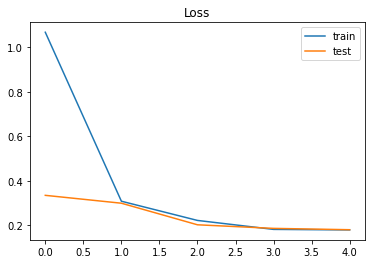

In [ ]:
plt.title('Loss')
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()

In [ ]:
cnn.save("model_save_file.h5")

In [ ]:
res = []

for img in os.listdir(test_data_path):
    test_image = plt.imread(os.path.join(test_data_path,img))
    result_image = test_image.reshape([WIDTH, HEIGHT, 3])
    res.append(result_image)
res = np.array(res)

In [ ]:
res_image = cnn.predict(res)

In [ ]:
result = []
i=0
for img in res_image:
    if(np.argmax(img) == 1):
        result.append(1)
    else:
        result.append(0)
    i+=1


In [ ]:
for i in os.listdir(test_data_path):
    print(i)

1.jpg
10.jpg
11.jpg
12.jpg
13.jpg
14.jpg
15.jpg
16.jpg
17.jpg
18.jpg
19.jpg
2.jpg
20.jpg
21.jpg
22.jpg
23.jpg
24.jpg
25.jpg
26.jpg
27.jpg
28.jpg
29.jpg
3.jpg
30.jpg
31.jpg
32.jpg
33.jpg
34.jpg
35.jpg
36.jpg
37.jpg
38.jpg
39.jpg
4.jpg
40.jpg
41.jpg
42.jpg
43.jpg
44.jpg
45.jpg
46.jpg
47.jpg
48.jpg
49.jpg
5.jpg
50.jpg
51.jpg
52.jpg
53.jpg
54.jpg
55.jpg
56.jpg
57.jpg
58.jpg
59.jpg
6.jpg
60.jpg
61.jpg
62.jpg
63.jpg
64.jpg
65.jpg
66.jpg
67.jpg
68.jpg
69.jpg
7.jpg
70.jpg
71.jpg
72.jpg
73.jpg
74.jpg
75.jpg
76.jpg
77.jpg
78.jpg
79.jpg
8.jpg
80.jpg
81.jpg
82.jpg
83.jpg
84.jpg
85.jpg
86.jpg
87.jpg
88.jpg
89.jpg
9.jpg
90.jpg
91.jpg
92.jpg
93.jpg
94.jpg
95.jpg
96.jpg
97.jpg
98.jpg


In [ ]:
dictio={}
for i,j in enumerate(os.listdir(test_data_path)):
    dictio[j] = result[i]

In [ ]:

def write_json(filename, result):
    with open(filename, 'w') as outfile:
        json.dump(result, outfile)

def generate_sample_file(filename):
    write_json(filename, dictio)


generate_sample_file('./result.json')